In [1]:
import tensorflow as tf
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

_ = sns.set_style('whitegrid')

print(tf.__version__)

2.16.2


# Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset

dataset = load_diabetes()

print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
# Save the input and target variables

data, targets = dataset['data'], dataset['target']
data.shape, targets.shape

((442, 10), (442,))

In [5]:
# Normalise the target data (this will make clearer training curves)

targets_normalised = (targets - targets.mean()) / targets.std()
targets_normalised.shape

(442,)

In [6]:
# Split the data into train and test sets

data_train, data_test, target_train, target_test = train_test_split(data, targets_normalised, test_size=.1)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((397, 10), (45, 10), (397,), (45,))

#### Train a feedforward neural network model

In [7]:
# Build the model

activation = 'relu'

model = Sequential([
    Dense(128, activation=activation, input_shape=(data_train.shape[1],)),
    Dense(128, activation=activation),
    Dense(128, activation=activation),
    Dense(128, activation=activation),
    Dense(128, activation=activation),
    Dense(128, activation=activation),
    Dense(1)
])

/Users/lautaro.quiroz/Documents/coursera/tensorflow2/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Print the model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,097 (328.50 KB)

 Trainable params: 84,097 (328.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model

loss = 'mse'
optimizer = 'adam'
metrics = ['mae']

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [10]:
# Train the model, with some of the data reserved for validation

history = model.fit(data_train, target_train, epochs=100, validation_split=.15, batch_size=64, verbose=False)

In [11]:
# Evaluate the model on the test set

model.evaluate(data_test, target_test, verbose=2)

2/2 - 0s - 4ms/step - loss: 0.7374 - mae: 0.6610


[0.737449586391449, 0.6609835624694824]

#### Plot the learning curves

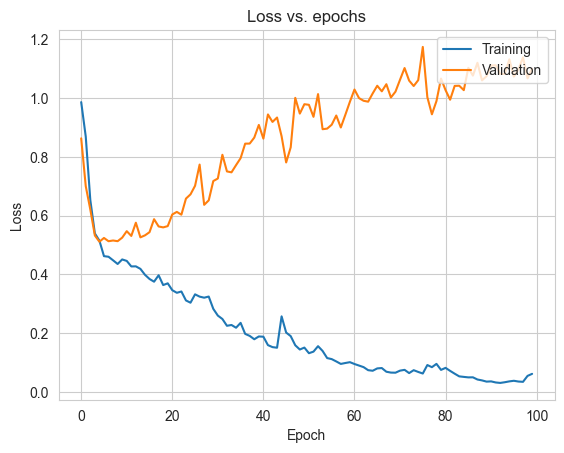

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

The model has overfit the training data.